目的：
1. 绘制 IMU 数据，并左右展示数据
步骤：
1. 导入包
2. 定义路径
3. 编写函数，批量运行

In [1]:
#导入包
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#确定路径，并切换
path = input("请输入数据的路径")
os.chdir(path)
print("当前路径为：{}".format(os.getcwd()))

当前路径为：/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230331不同鞋对鞋垫数据影响分析


In [3]:
#新建 IMU_plot  文件夹
dir_plot_name = "IMU_plot"

if not os.path.exists(dir_plot_name):
    os.mkdir(dir_plot_name)

if os.path.exists(dir_plot_name):
    print("已经成功新建 IMU_plot")

已经成功新建 IMU_plot


In [4]:
file = "hwshuai_步行6步-特步-42鞋码-41鞋垫-模块604f-第二次_202303311709129111.csv"
start_index = 0
df = pd.read_csv(file)
end_index = df.shape[0]

In [6]:
import numpy as np
from scipy.spatial.transform import Rotation

def transform_euler_angles(quaternion):
    """
    使用四元数转换欧拉角，并将其转换为特定形式的欧拉角。
    
    Args:
        quaternion (list): 长度为4的列表，表示四元数。
    
    Returns:
        list: 长度为3的列表，表示经过转换的欧拉角。
    """
    # 使用四元数转换欧拉角
    rotation = Rotation.from_quat(quaternion)
    euler_angles = rotation.as_euler("zyx", degrees=True)
    
    # 将欧拉角转换为特定形式
    # 仅使用 transform 转化，得到的数据不正确，需要进一步转化
    # 第一个角度不需要变化，第二个角度前面加负数，第三个是和180互补加负数
    transformed_angles = np.round([euler_angles[0], -euler_angles[1], -(180 - euler_angles[2])], 6)
    
    return transformed_angles

In [5]:
#确定图片储存的路径以及名称
def plot_IMU_data(path,dir_plot_name,file,start_index,end_index):
    regex = r"(.*)_(.*)_(.*)"
    mysearch = re.search(regex,file)
    if mysearch:
        plot_name = mysearch.group(2) + "-" + dir_plot_name
    path_plot = os.path.join(path,dir_plot_name,plot_name)

    df = pd.read_csv(file)
    df_sel = df.loc[start_index:end_index-1]
    L_data = df_sel[df_sel["part" ]== "L"]
    R_data = df_sel[df_sel["part" ]== "R"]
    g_cols = ["gx","gy","gz"]
    a_cols = ["ax","ay","az"]
    q_cols = ["qx","qy","qz","qw"]

    #创建一个包含多个子图的 Figure 对象和 AxesSubplot
    fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(12,6))

    #调整子图的位置和大小
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    fig.set_size_inches(10,8)

    plt.rcParams['font.sans-serif'] = ['Heiti TC', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
    plt.rcParams['font.size'] = 12  # 字体大小
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

    #绘制左右脚数据
    L_data.loc[:,q_cols].plot(ax=axs[0,0],title="左脚四元数数据")
    R_data.loc[:,q_cols].plot(ax=axs[0,1],title="右脚四元数数据")

    L_data.loc[:,a_cols].plot(ax=axs[1,0],title="左脚加速度数据")
    R_data.loc[:,a_cols].plot(ax=axs[1,1],title="右脚加速度数据")

    L_data.loc[:,g_cols].plot(ax=axs[2,0],title="左脚角加速度数据")
    R_data.loc[:,g_cols].plot(ax=axs[2,1],title="右脚角加速度数据")

    # 添加注释，解释代码的目的和功能
    plt.suptitle(plot_name, fontsize=16)
    fig.text(0.5, 0.02, "时间", ha="center")
    fig.text(0.08, 0.5, "数据值", va="center", rotation="vertical")

    #保存图片
    plt.savefig(path_plot)
    plt.clsoe()

/var/folders/md/64nqf05s393b0_jv5bh7fhjc0000gn/T/ipykernel_37749/3402171589.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(12,6))


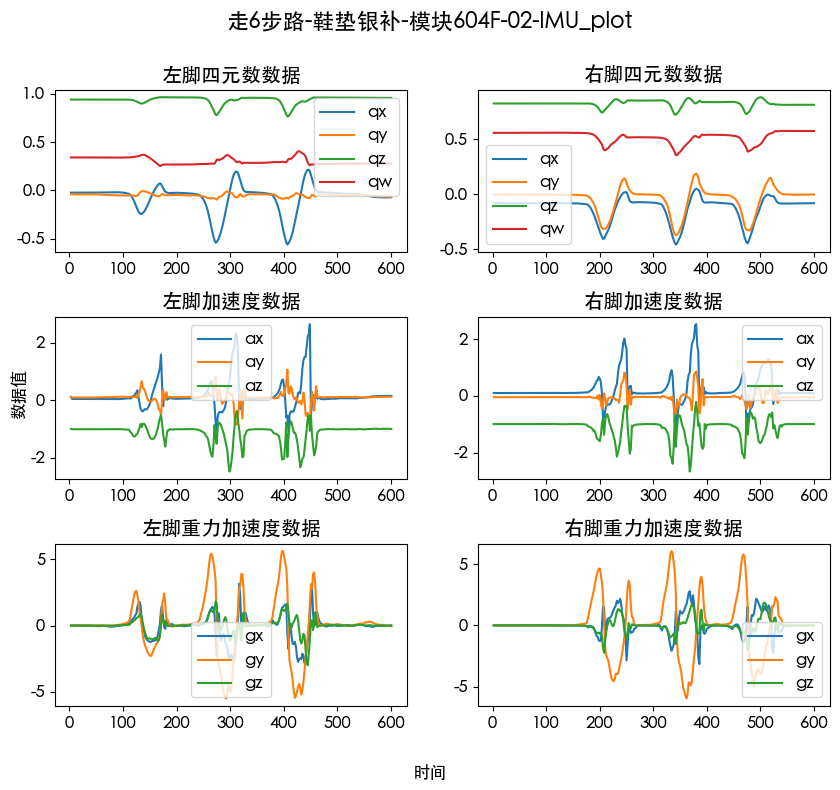

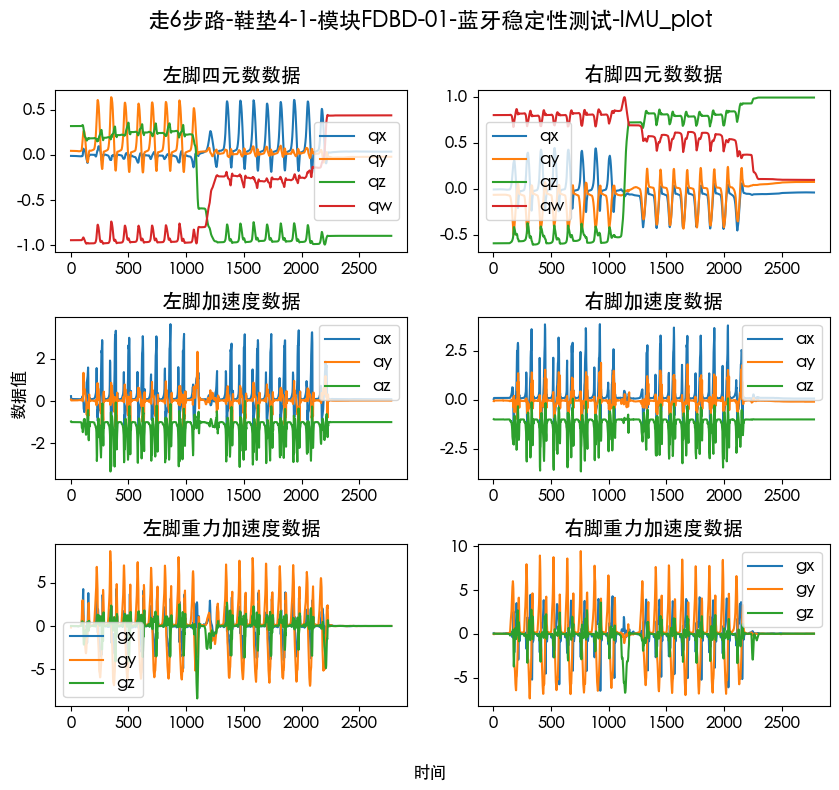

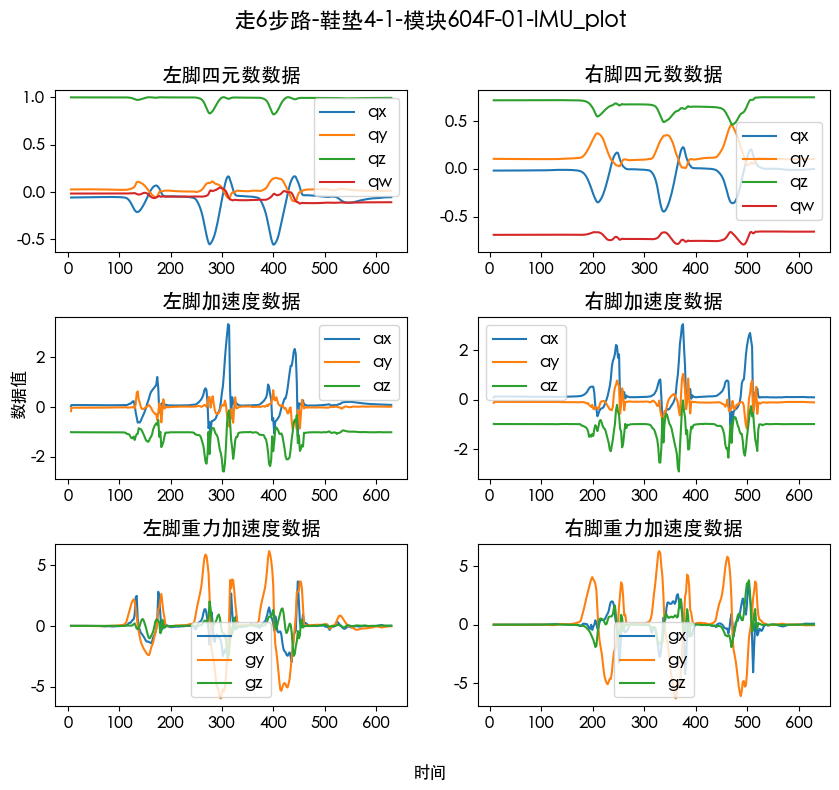

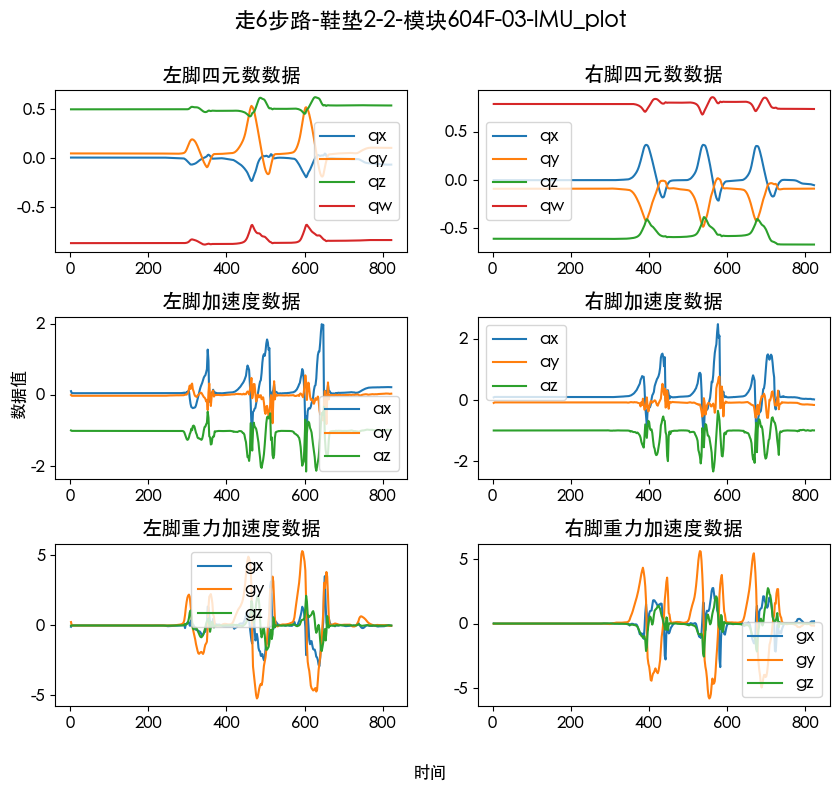

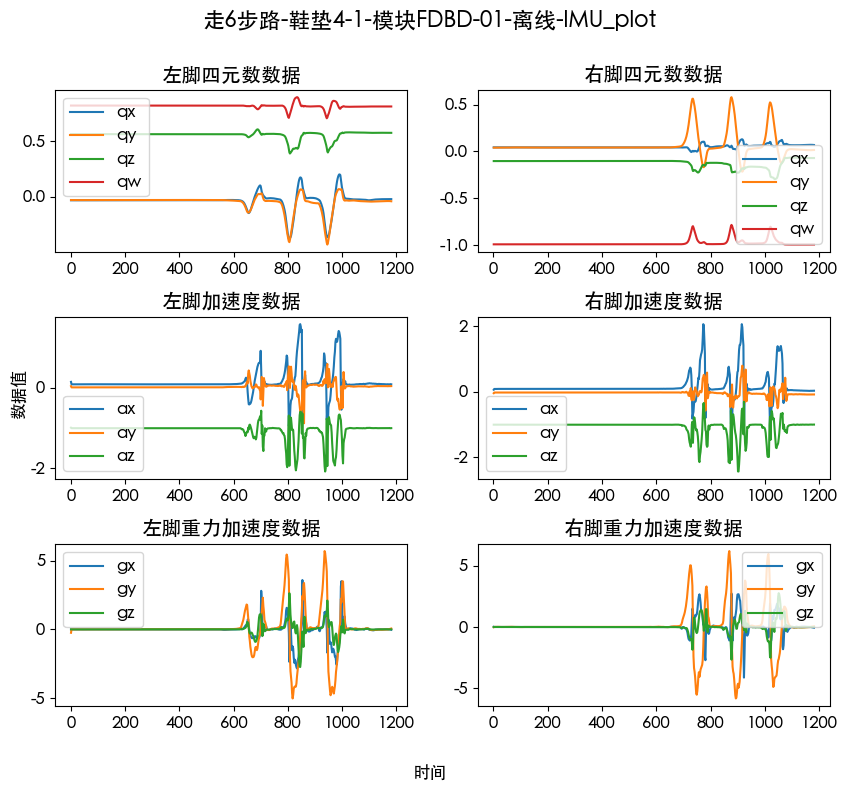

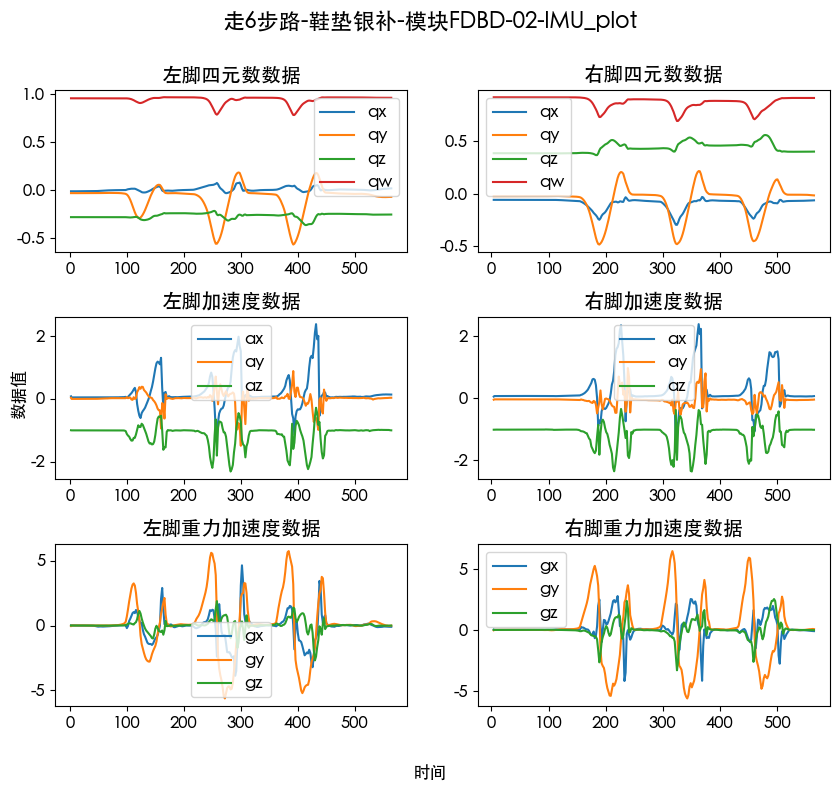

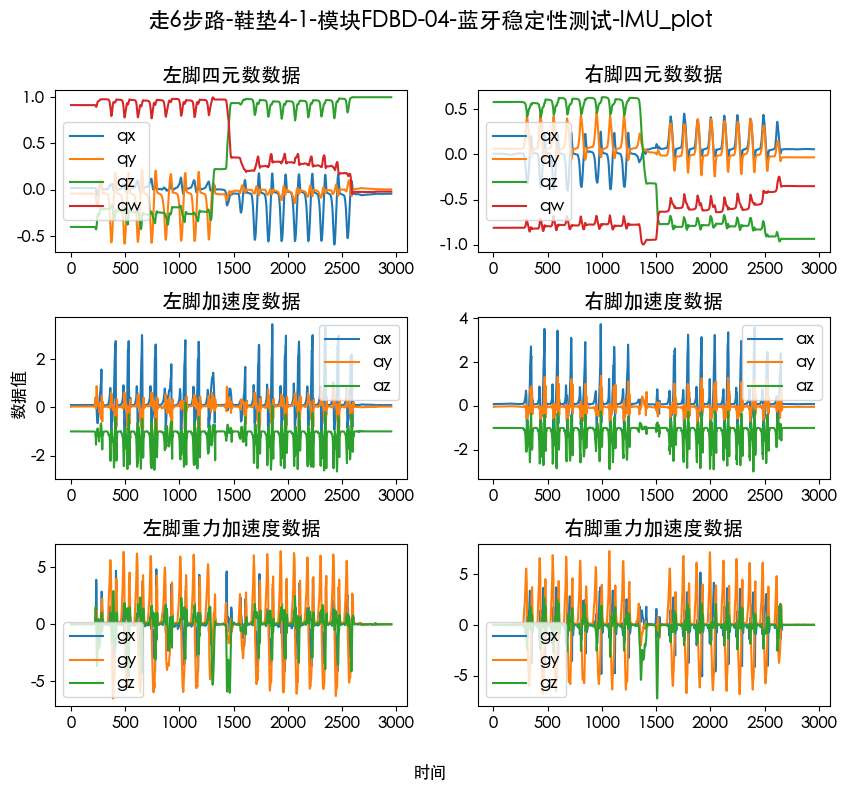

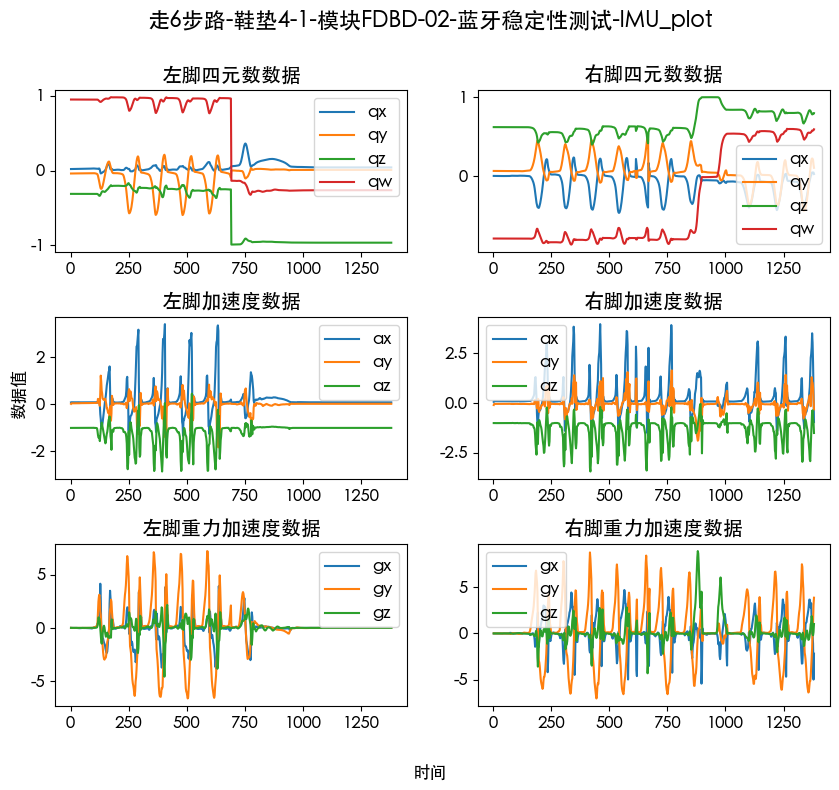

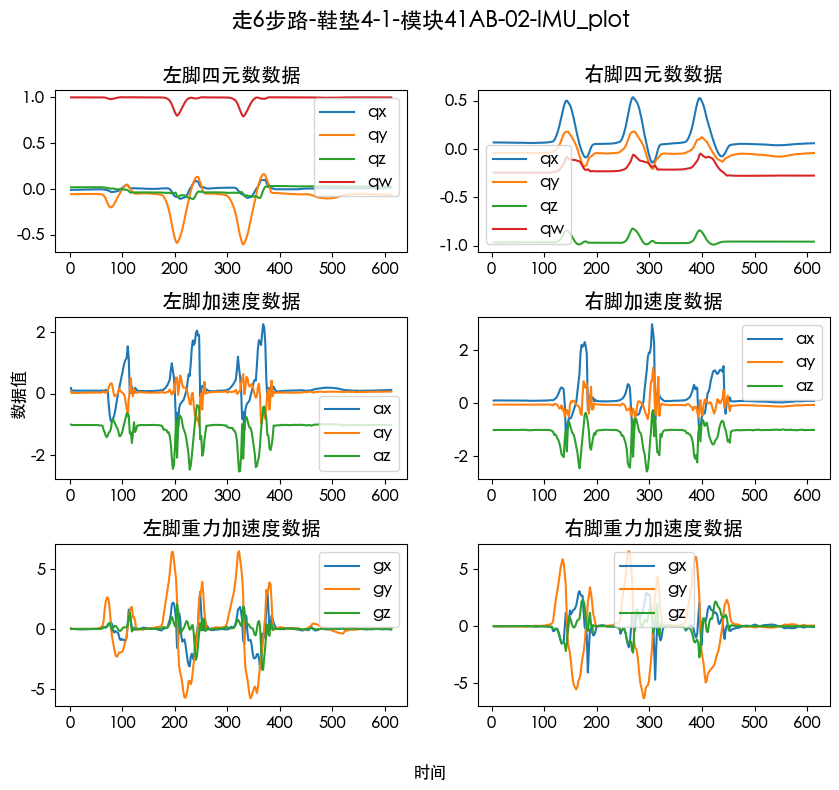

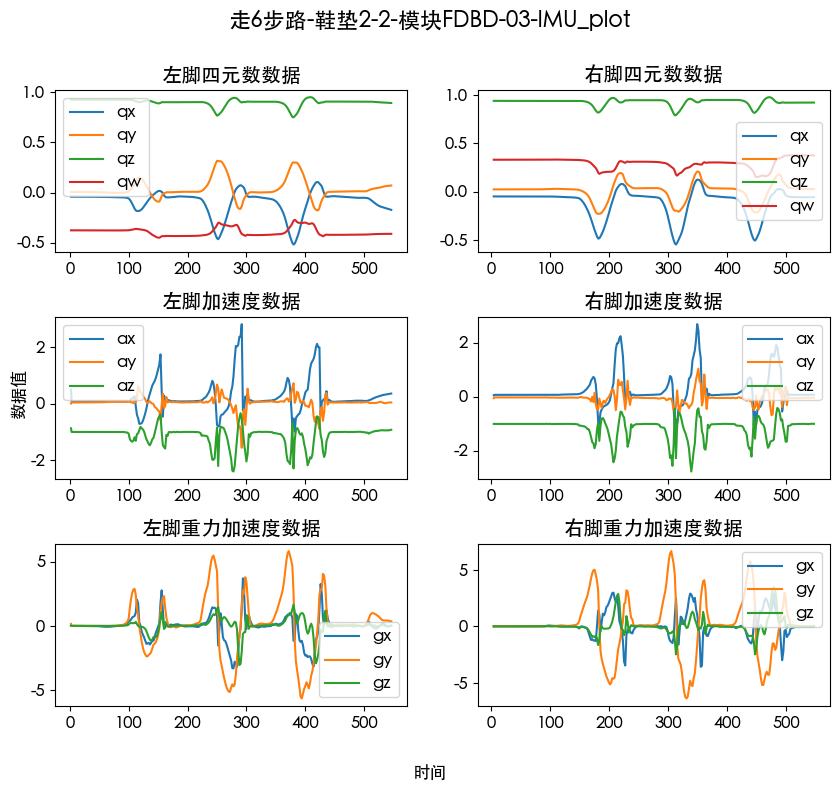

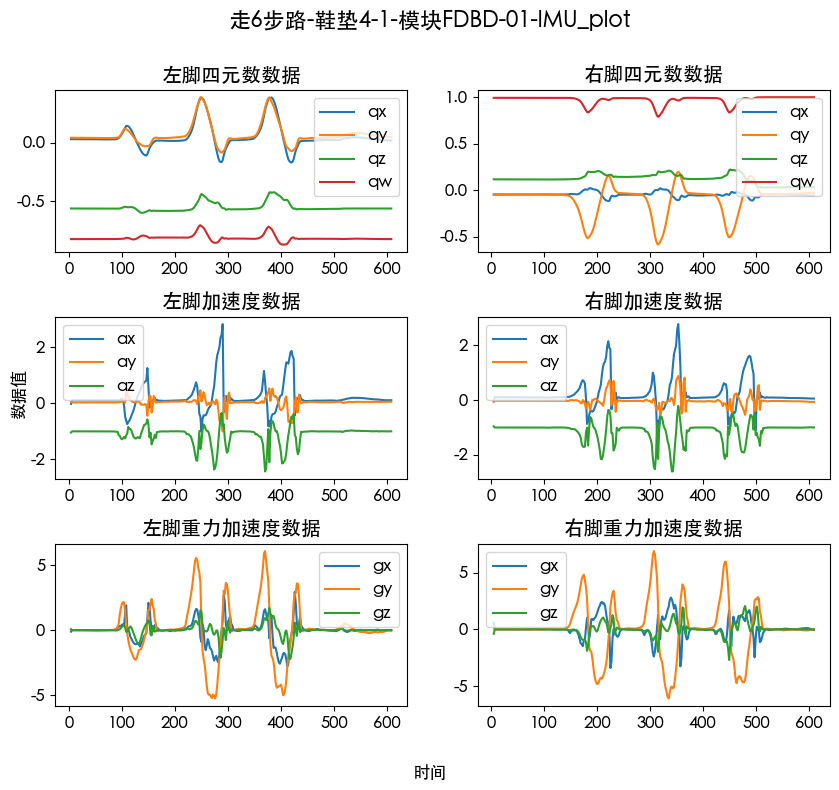

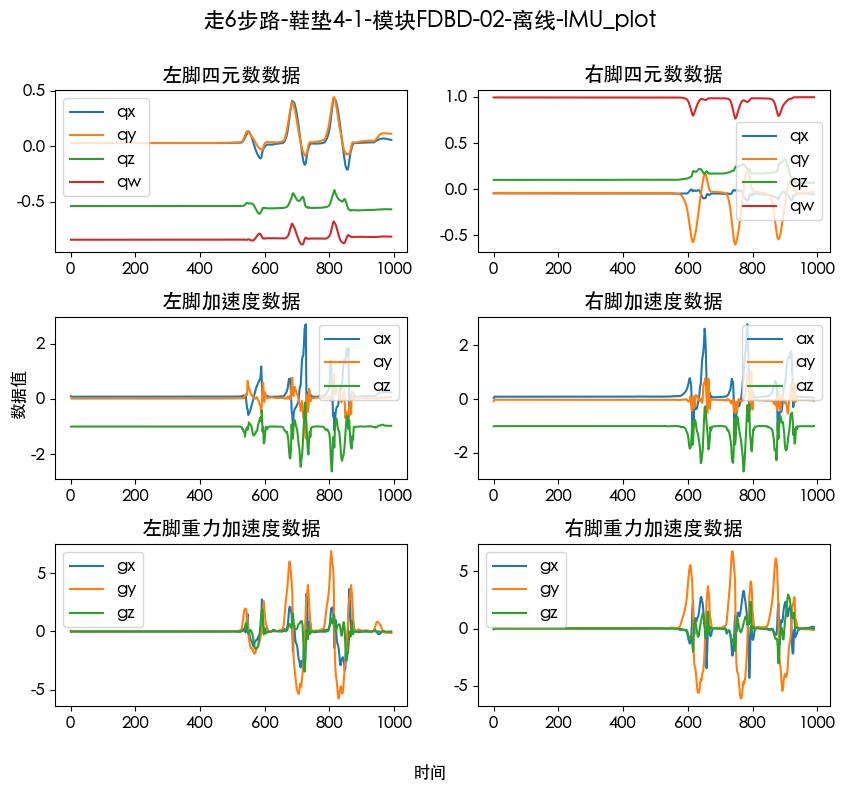

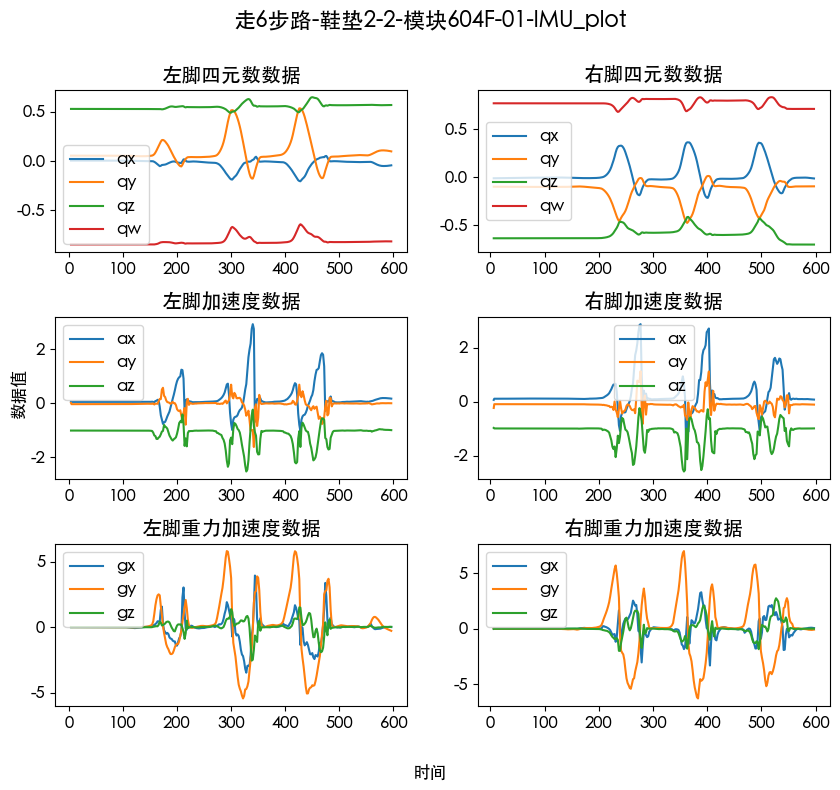

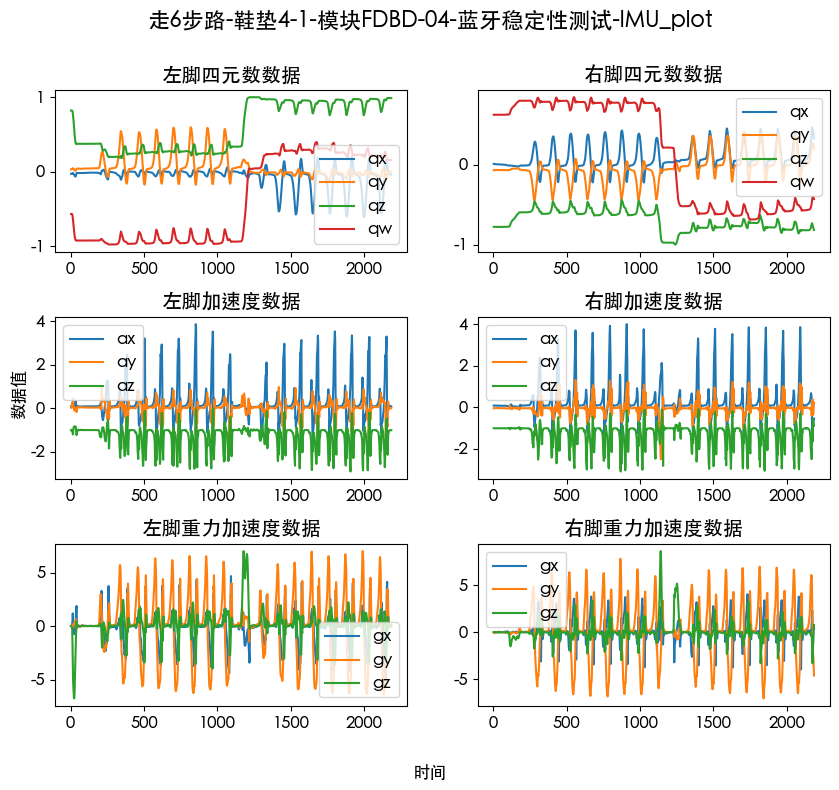

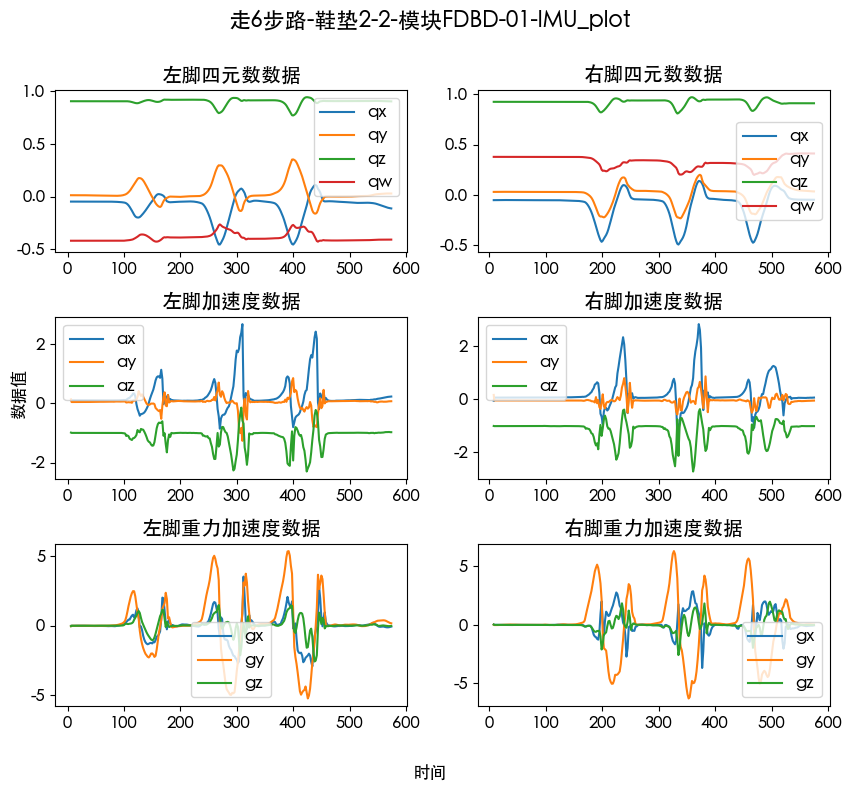

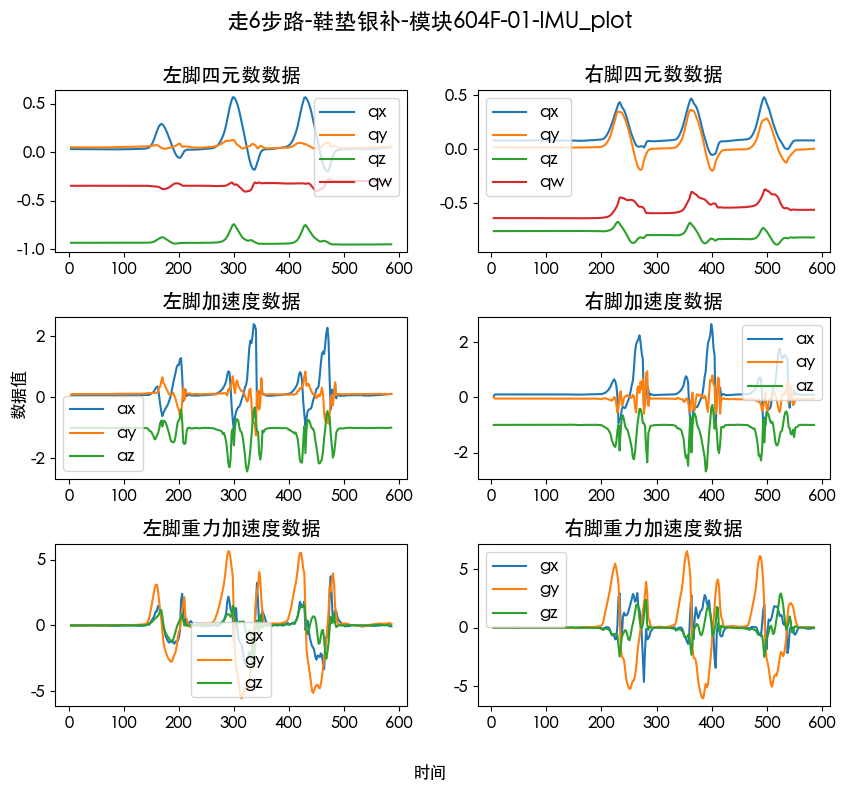

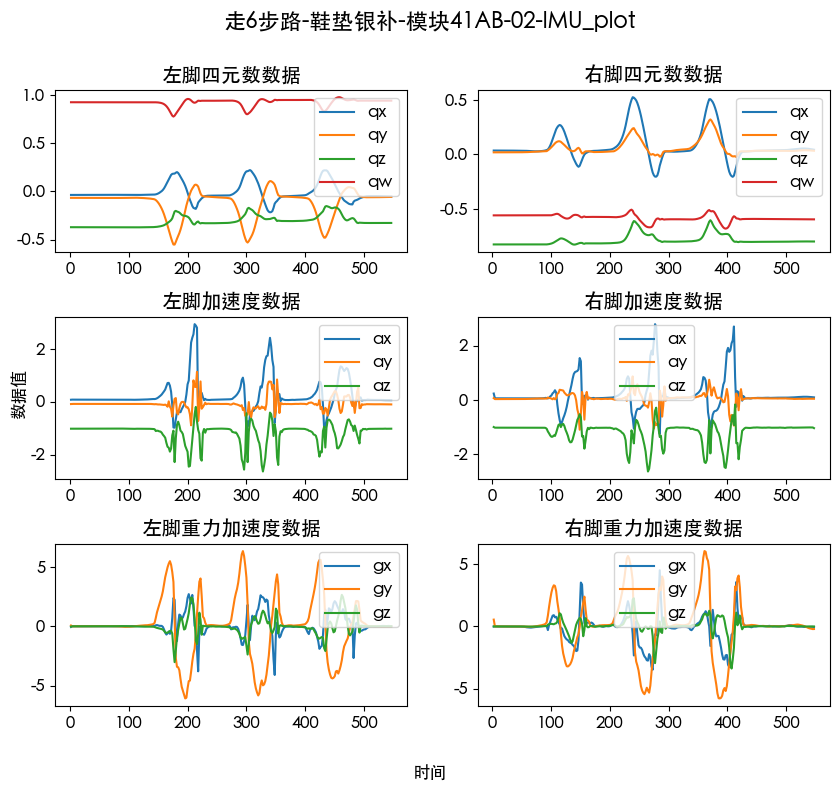

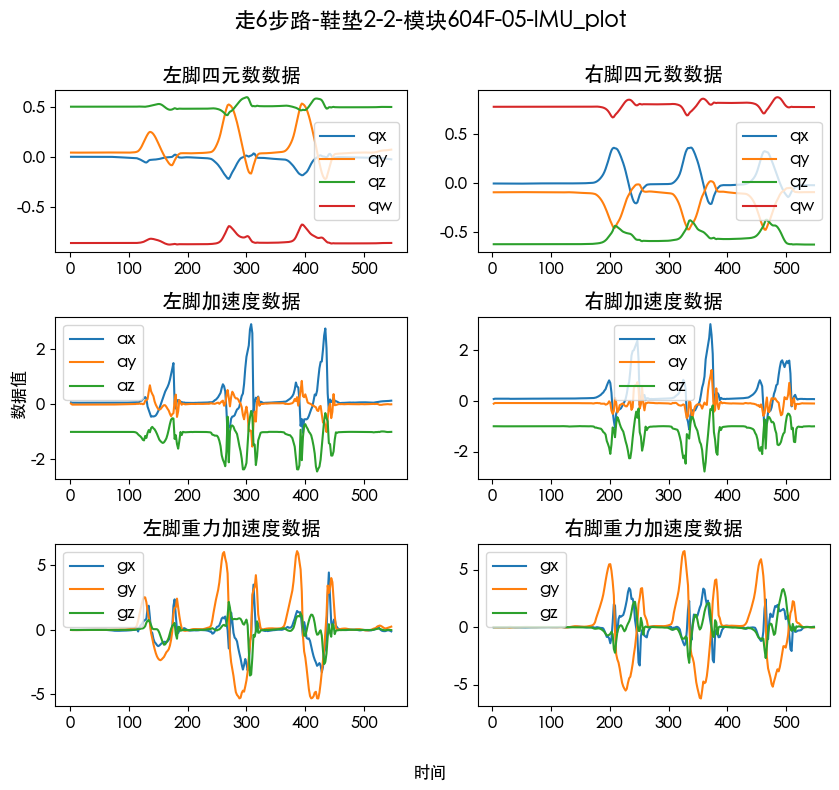

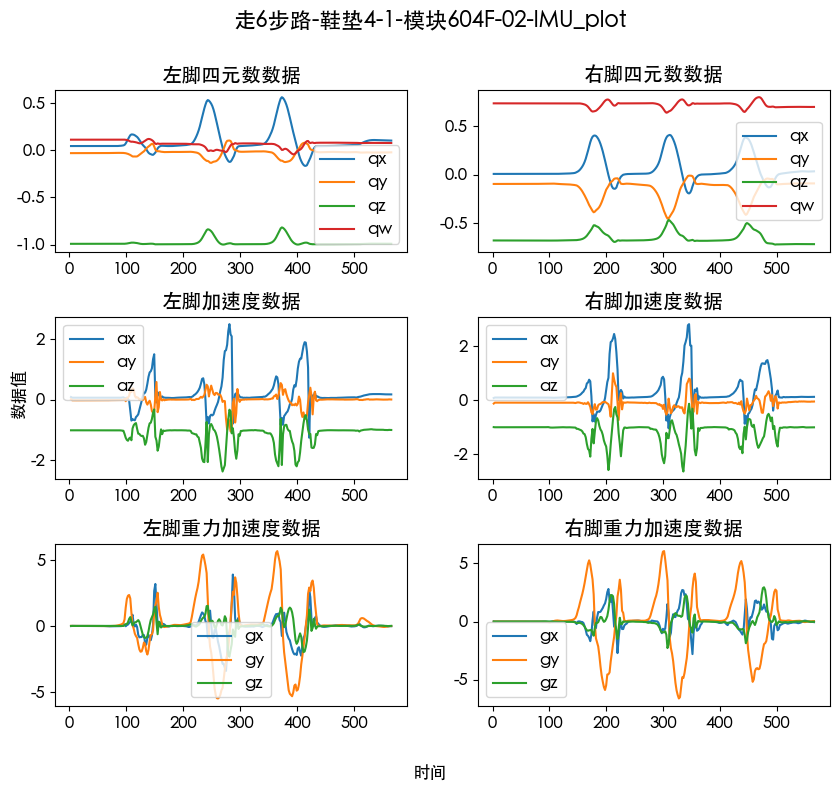

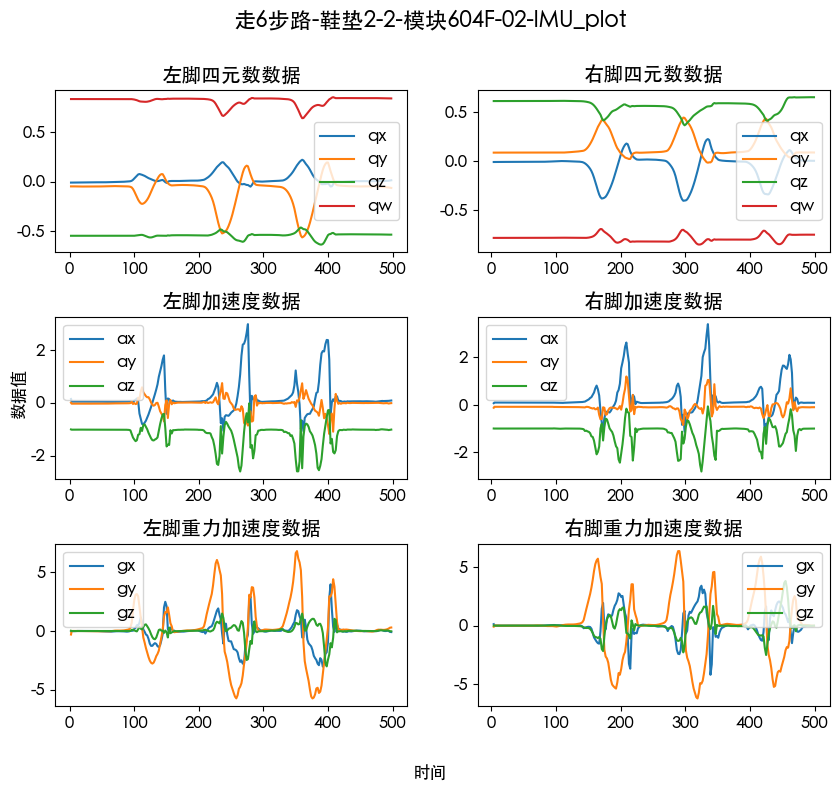

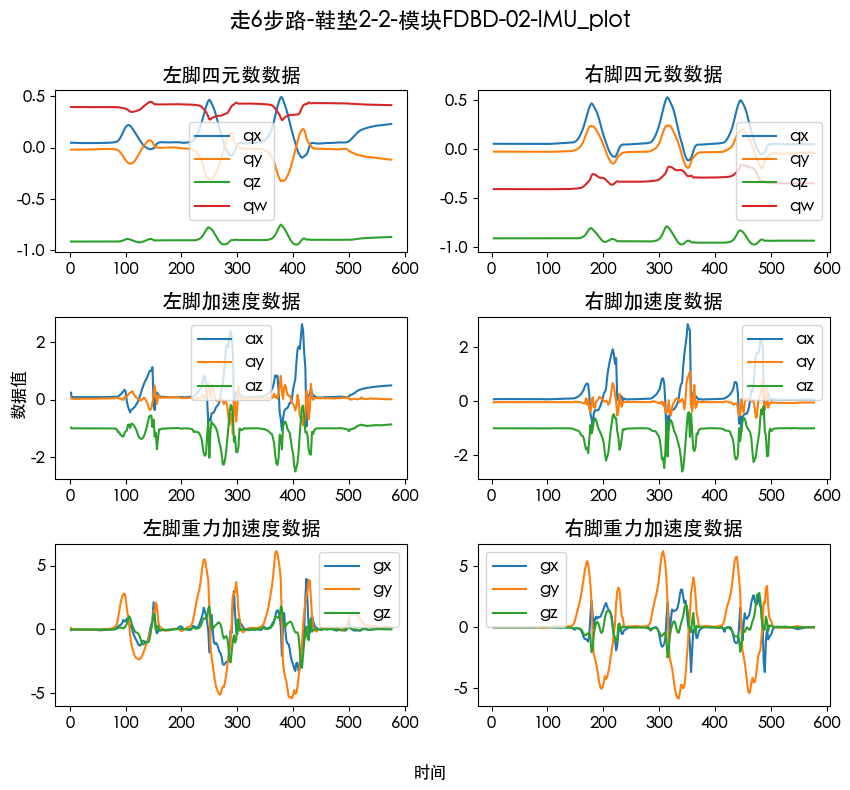

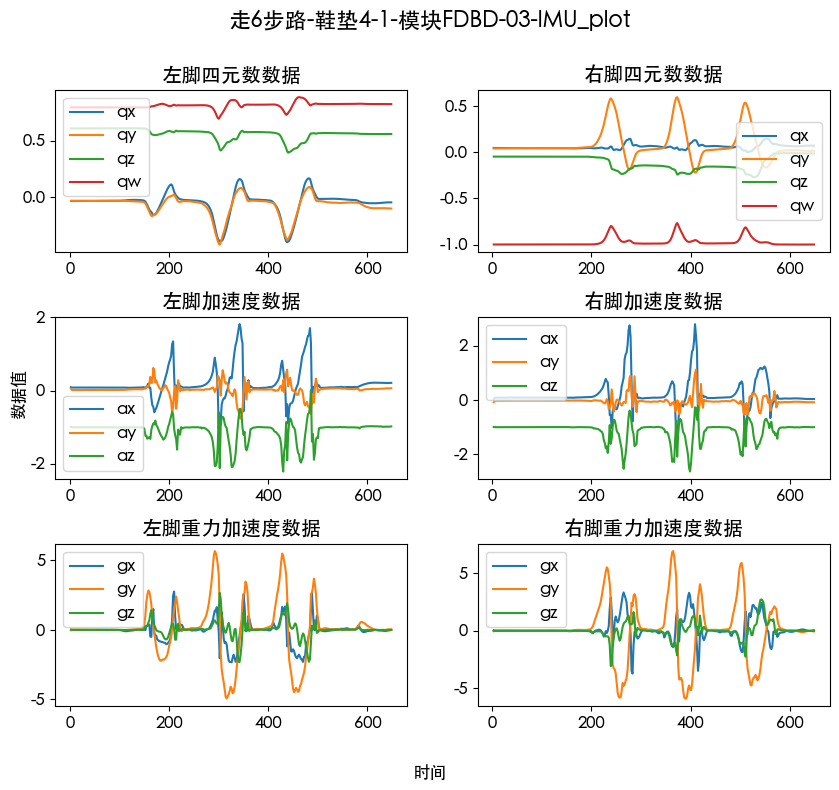

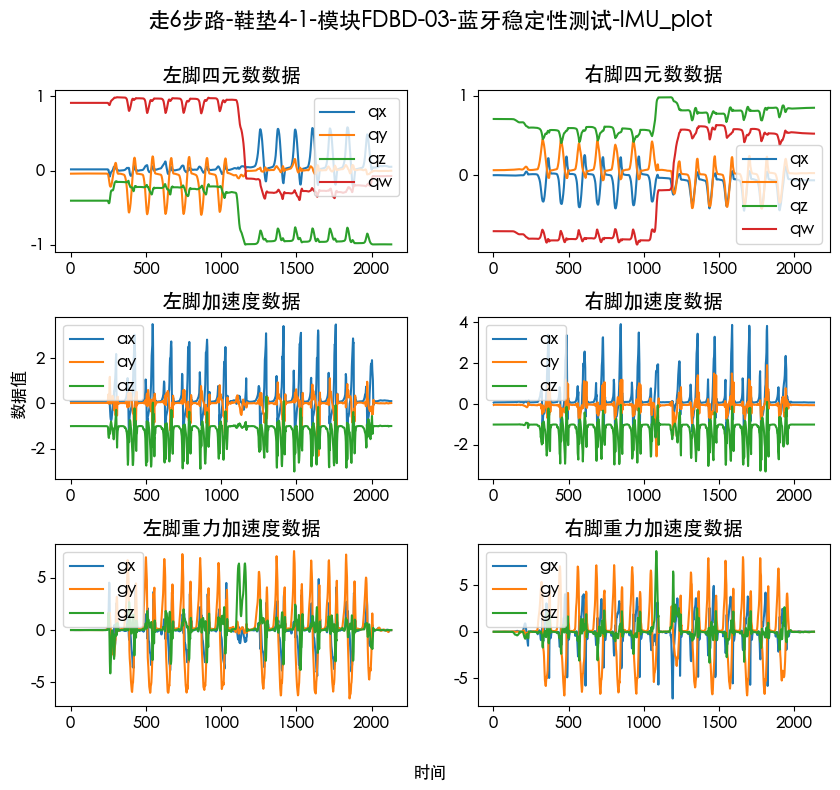

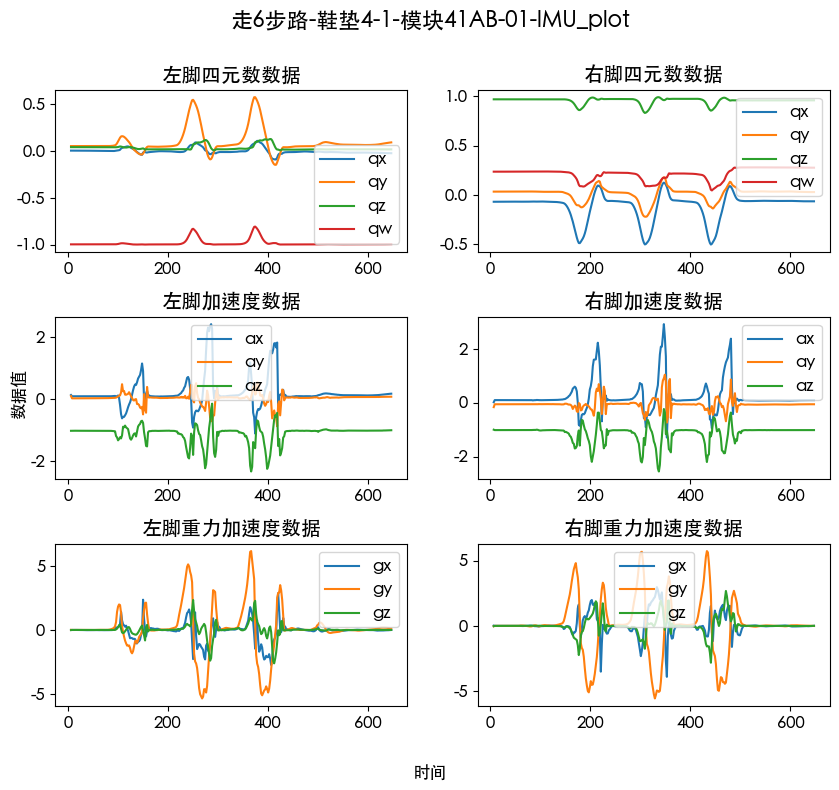

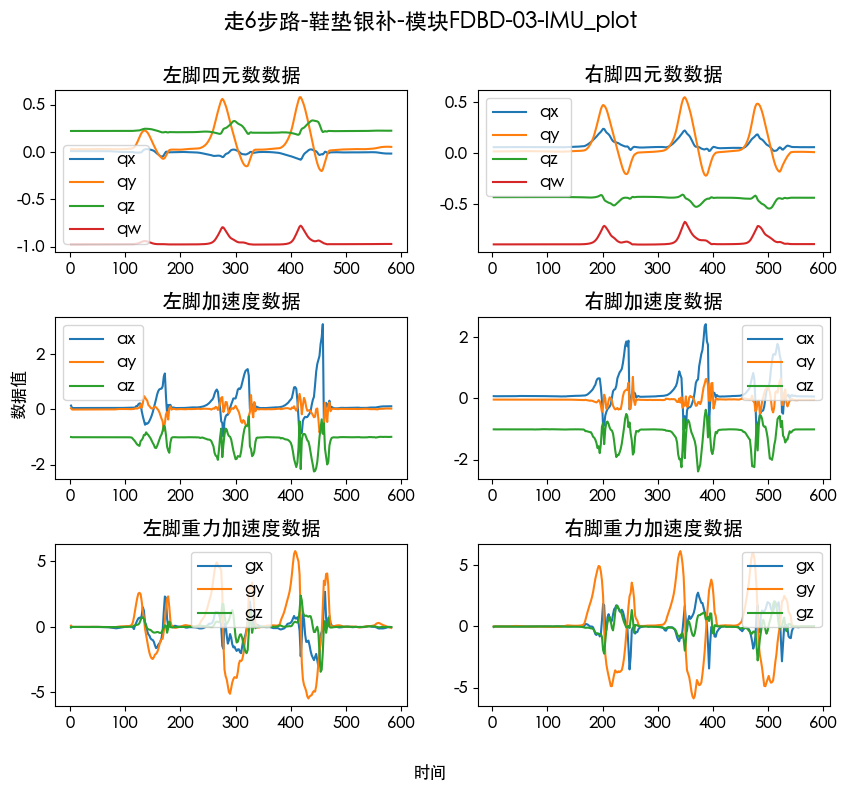

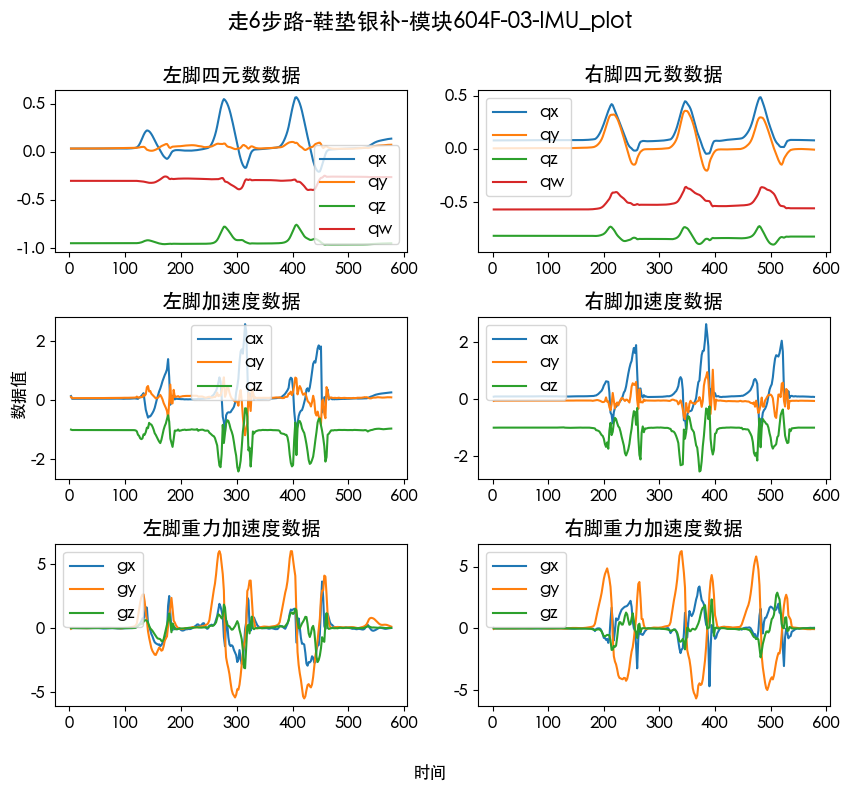

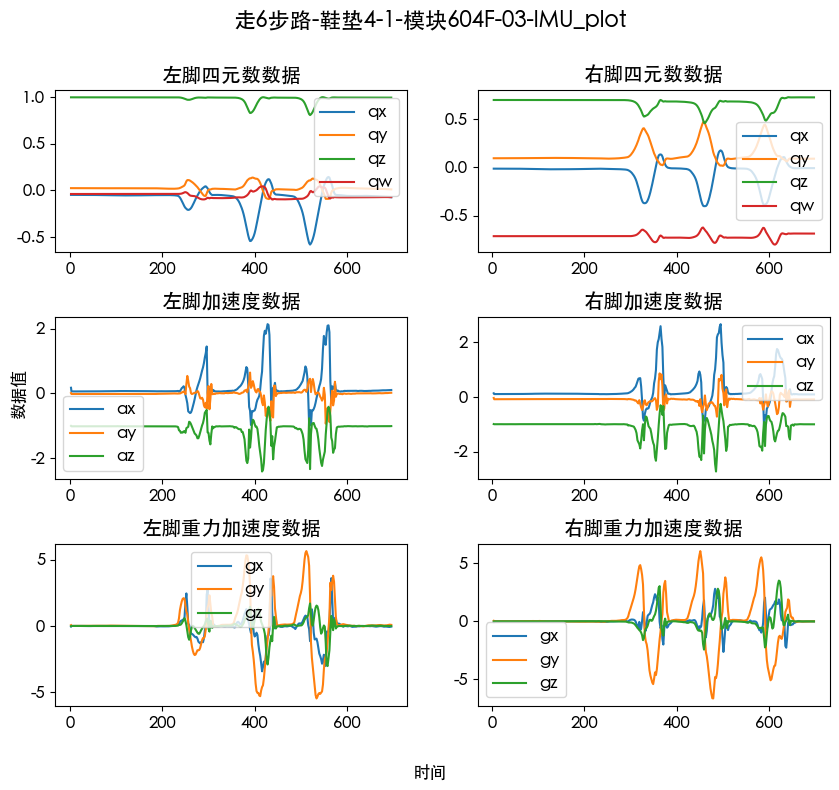

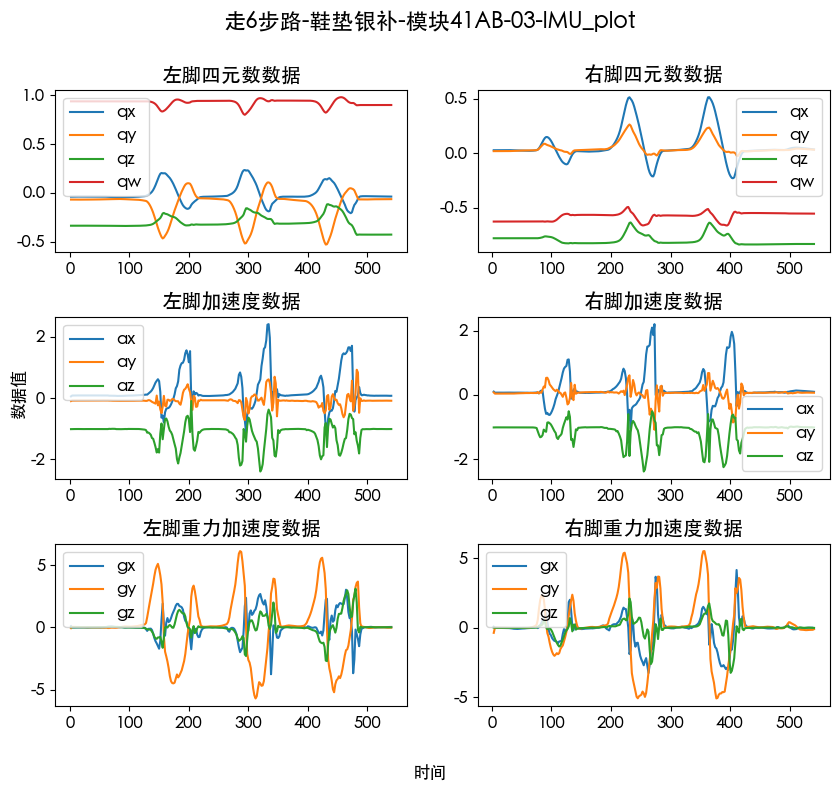

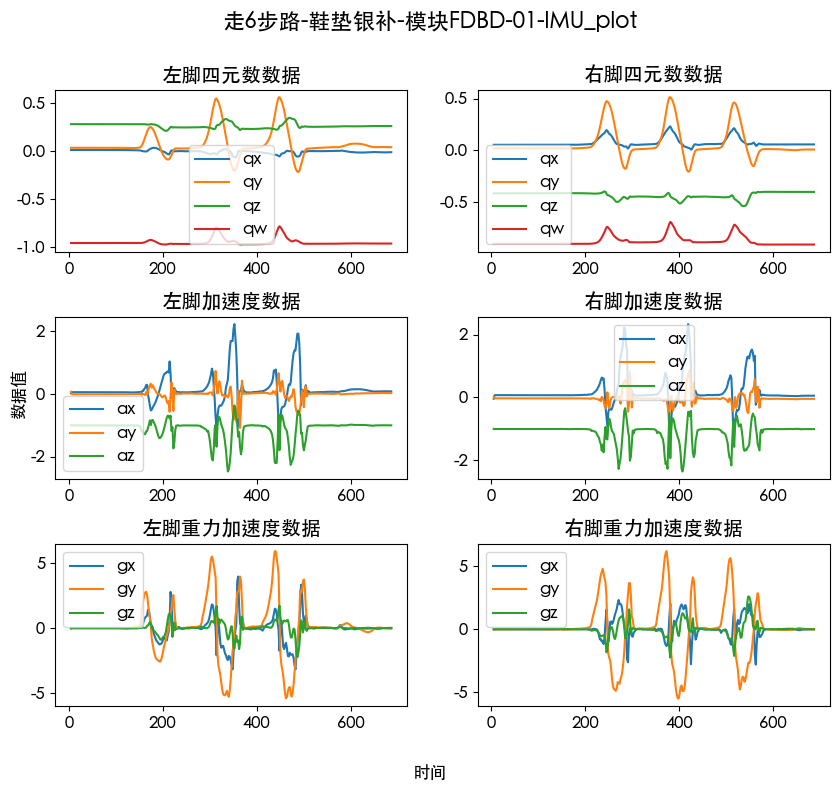

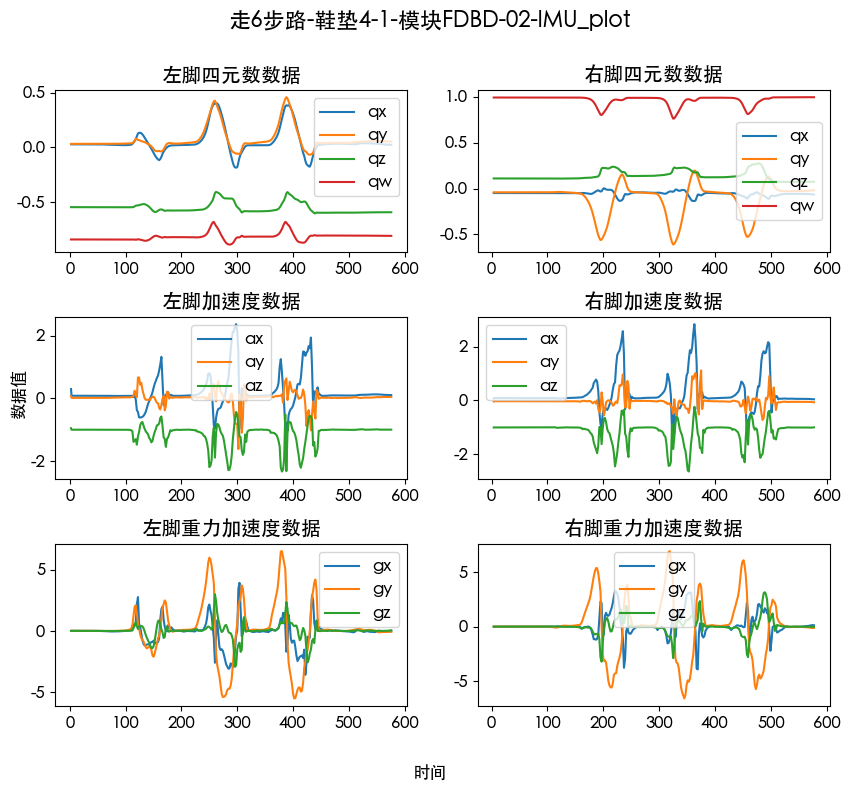

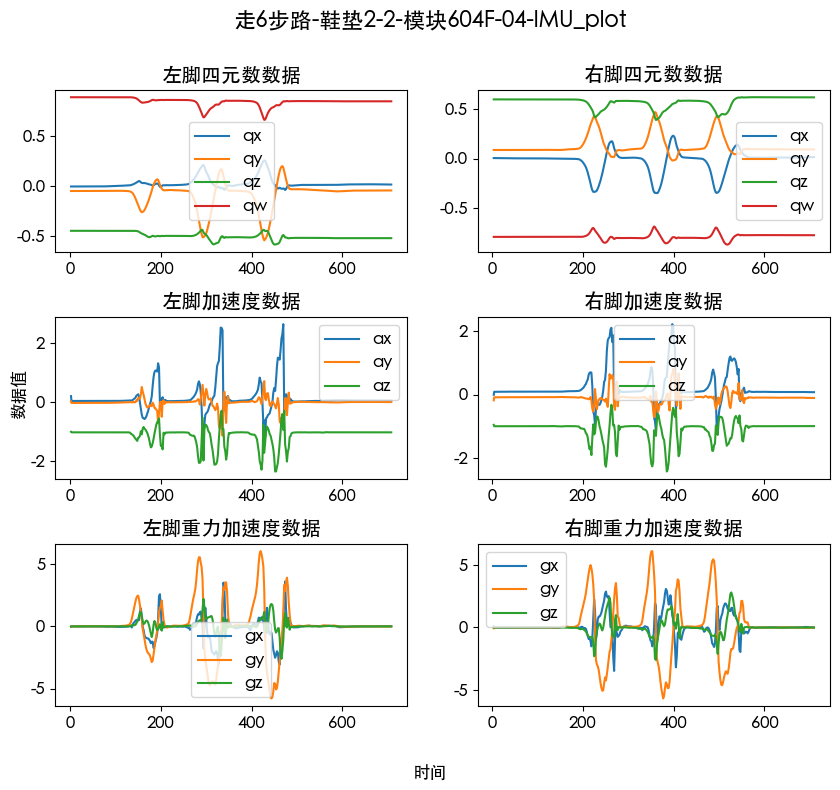

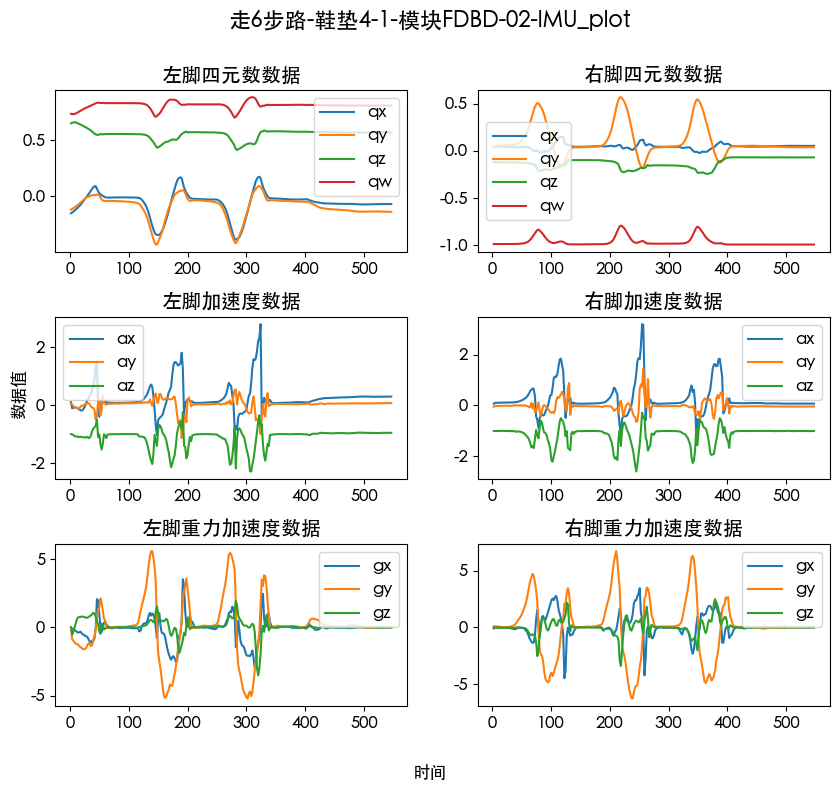

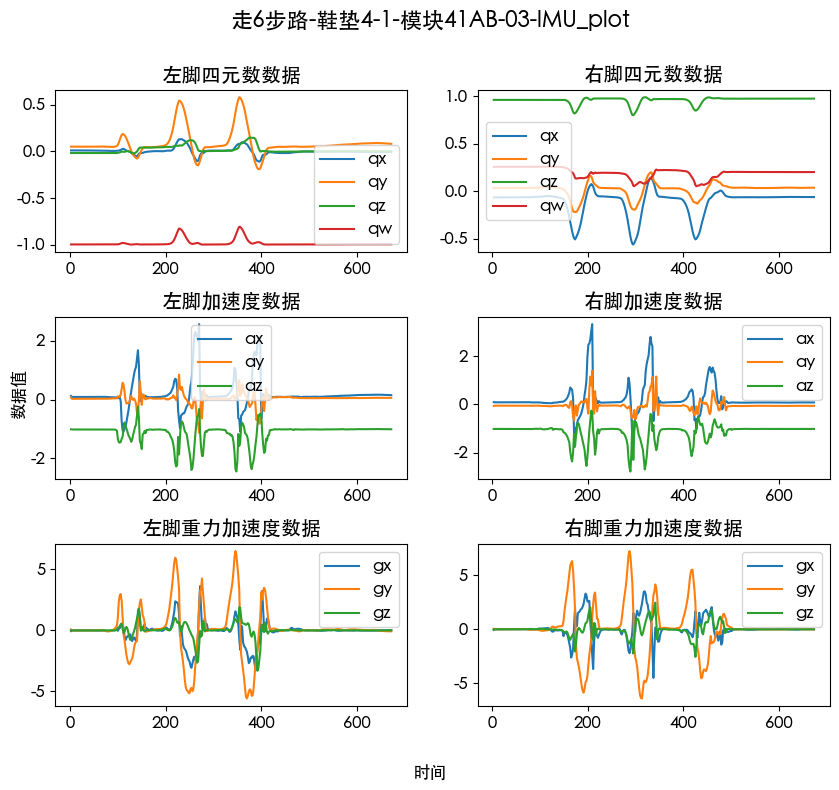

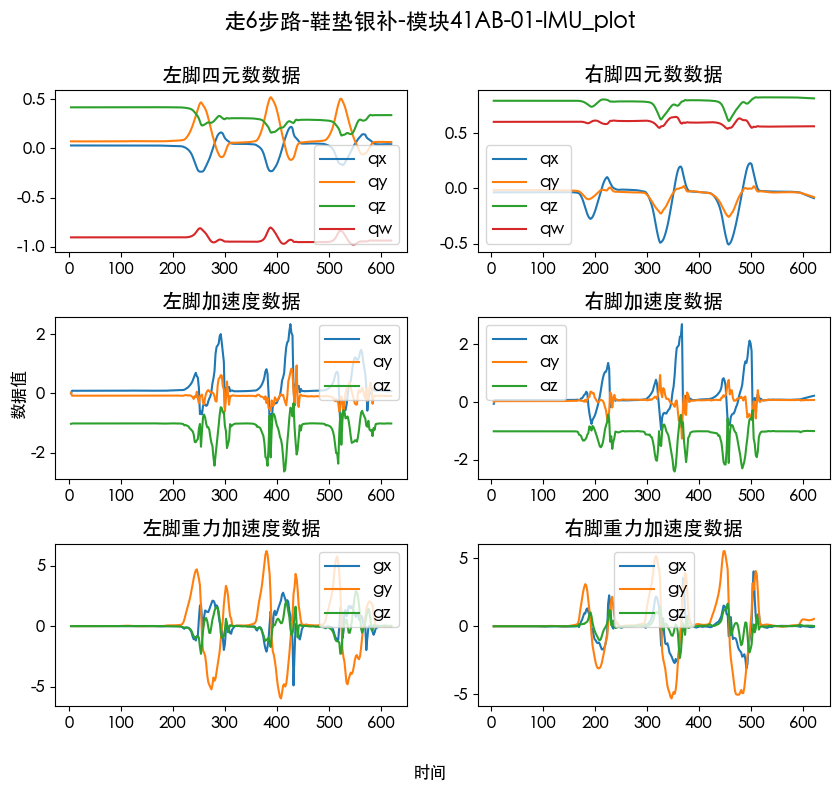

In [133]:

for file in os.listdir(path):
    if ".csv" in file:
        # 默认索引全部数据
        df = pd.read_csv(file)
        end_index = df.shape[0]
        start_index = 0

        #绘图
        plot_IMU_data(path,dir_plot_name,file,start_index,end_index)

'走6步路-鞋垫2-2-模块604F-01走6步路-鞋垫2-2-模块604F-01'